- 이진 분류, 다중 분류, 회귀 예제를 사용
- GPU를 사용한 딮러닝 실행

# 1. 신경망의 구조

- 신경망 훈련에 관련 된 요소
    1. 네트워크를 구성하는 층
    2. 입력 데이터와 상응하는 타깃
    3. 피드백 신호를 정의하는 손실 함수
    4. 학습 진행 방식을 진행하는 옵티마이저
    
- 각 요소 사이의 관계
![관계_그림_예시](./images/relation.jpg)

## 1.1. 층: 딮러닝의 구성 단위

- 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 대부분의 경우 가중치라는 층의 상태를 가짐
- 텐서 종류에 따른 층의 사용
    1. 2D 텐서 -> 완전 연결 층
    2. 3D 텐서 -> LSTM 같은 순환 층
    3. 4D 텐서 -> 2D 합성곱 충(convolution layer)

- 케라스에서는 층을 레고 블럭과 같이 생각 할 수 있다.
- 케라스는 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구성한다.


- 케라스에서 층 호환성이란?
    - 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환하는 것
    

### 예시

In [1]:
from keras import layers

# keras.layers.Dense(output_shape, input_shape=(input_shape))
layer = layers.Dense(32, input_shape=(784,))

Using TensorFlow backend.


- 위 코드 예시는 첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층이다.
- 출력 텐서 크기는 32이다.
- 다음 레이어는 입력 크기가 32인 층으로 자동으로 맞추어 준다. (층 호환성으로 인해서)


### 모델로 만든 예시

In [2]:
from keras import models

model = models.Sequential() # 모델을 층을 연속적으로 쌓아서 하나의 모델로 표시하게 한다.
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10)) # 층 호환성이 없다면 layers.Dense(10, input_shape(32))라고 입력 크기를 지정해야 한다.

두 번째 밀집층에서 입력 크기를 지정하지 않았음에도 모델이 만들어지는것을 확인할 수 있다.

## 1.2. 모델: 층의 네트워크

- 딮러닝 모델은 층으로 만든 비순환 유향 그래프이다.
- 자주 등장하는 네트워크 구조
    1. 가지가 2개인 네트워크
    2. 출력이 여러 개인 네트워크
    3. 인셉션 블록

## 1.3. 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠

- 네트워크 구조를 정의하고나서 해야할 것
    1. 손실 함수: 훈련동안 최소화될 값(성공 지표)
    2. 옵티마이저: 손실 함수를 기반으로 네트워크가 어떻게 업데이트 될지 결정(ex: SGD, Adam, momentum...)


- 여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있다.


- 올바른 손실 함수를 선택하는 지침
    1. 2개의 클래스가 있는 분류 문제 : 이진 크로스엔트로피
    2. 회귀 문제 : 평균 제곱 오차
    3. 시퀸스 학습 문제 : CTC
    4. 새로운 연구 : 독자적인 함수

# 2. 케라스 소개

- 케라스의 특징
    1. 동일한 코드로 CPU와 GPU에서 실행 할 수 있다.
    2. 사용하기 쉬운 APi를 가지고 있다.
    3. 합성곱 신경망, 순환 신경망을 지원하며 둘을 조합 할 수 있다.
    4. 어떤 네트워크 구조도 만들 수 있다.

## 2.1. 케라스, 텐서플로, 씨아노, CNTK

- 케라스 특징
    1. 모델 수준의 라이브러리
    2. 텐서 조작, 미분 같은 저수준 연산을 다루지 않는다.
    3. 백엔드에서 제공하는 최적화된 텐서 라이브러리 사용

## 2.2. 케라스를 사용한 개발: 빠르게 둘러보기

- 케라스 작업 흐름
    1. 훈련 데이터 정의
    2. 네트워크 정의
    3. 지표 선택을 선택하여 학습 과정을 설정
    4. fit() 메서드를 반복절으로 호출


- 모델을 정의하는 방법
    1. Sequential 클래스를 사용
    2. 함수형 API 사용
    
    
### Sequential 클래스를 사용하는 예

In [3]:
model = models.Sequential() 
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

### 함수형 API를 사용하는 예

In [4]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

- 모델 구조가 정의된 후에는 어떤 방법을 사용했는지는 상관없이 이후 단게는 같다.


### 컴파일 단계
1. 손실함수 정의
2. 옵티마이저 정의
3. 측정 지표 설정(선택)

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # 학습률이 0.001으로 설정
             loss = 'mse',
             metrics=['accuracy']) # 측정 지표로는 정확도를 사용

### 학습 단계

- fit() 메소드를 사용하여 학습

In [6]:
#model.fit(input_tensor, target_tensor, batch_size=128, epoch=10) 여기서는 타겟 텐서가 없으므로 주석 처리한다.

# 3. 딮러닝 컴퓨터 셋팅

- 이 소단원은 하드웨워 및 프로그램 선택에 관한 이야기이므로 생략

# 4. 영화 리뷰 분류: 이진 분류 예제

- 영화 리뷰에 대한 긍정(positive), 부정(negative)을 예측하는 문제
- 클래스가 2개이므로 이진분류로 사용

## 4.1. IMDB 데이터셋

- 데이터셋
    1. 종류 : 인터넷 영화 데이터베이스에서 가져온 양극단 리뷰
    2. 개수 : 약 5만개
    3. 분류 : 훈련 데이터 2.5만, 테스트 데이터 2.5만
    
    
### 데이터 로드

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

- num_word 인자 -> 훈련 데이터에서 가장 자주 나타나는 단어 수를 사용
- *_data = 리뷰 목록
- *_labels = 부정(0), 긍정(1)을 나타내는 리스트


### 리뷰 데이터

- 리뷰 데이터는 단어가 수자로 매핑되어있다. 

In [8]:
print("0번 리뷰 : {}".format(train_data[0]))

0번 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### 라벨 데이터

- 긍정일 경우 1, 부정일 경우 0

In [9]:
print("0번 리뷰의 라벨: {}".format(train_labels[0]))

0번 리뷰의 라벨: 1


### 단어의 수 측정

- 가장 자주 산용되는 단어 10000개로 정해놓았기 때문에 10000개 이상의 단어 수를 넘지 않는다

In [10]:
max([max(sequence) for sequence in train_data])

9999

### 영단어와 매핑하여 리뷰 데이터 확인

In [11]:
word_index = imdb.get_word_index() # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [12]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 4.2 데이터 준비

- 신경망에는 숫자 리스트를 주입할 수 없다.
- 리스트를 텐서로 변경하는 방법
    1. 같은 길이가 되도록 리스트에 패딩 추가하여 (samples, sequence_length) 크기의 정수 텐서로 변환
    2. 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환
    

### 정수 시퀸스를 이진 행렬로 인코딩

In [13]:
import numpy as np

#각 문장에서 나온 단어를 1로 만드는 함수

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # 특정 인덱스의 위치를 1로 만듬
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [14]:
print("인코딩한 훈련 데이터 0번 : {}".format(x_train[0]))

인코딩한 훈련 데이터 0번 : [0. 1. 1. ... 0. 0. 0.]


### 레이블을 벡터로 변환

In [15]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

## 4.3. 신경망 모델 만들기

- relu 함수를 사용한 완전 연결 층을 사용
- 은닉 유닛이 늘어나면 학습의 표현력이 늘어나지만 계산 비용이 커진다.

- Dense 층을 쌓을 때 필요한 구조상으 ㅣ결정
    1. 얼마나 많은 층을 쌓을 것인가?
    2. 얼마나 많은 은닉 유닛을 둘 것인가?
  
  
### 3층으로 쌓은 신경망 구현

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 옵티마이저 설정

- 이진 분류 문제 -> binary crossentropy 사용
- 옵티마이저 -> rmsprop 사용
- 훈련 평가 지표 -> accuracy 사용

In [17]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### 케라스의 내장 되어 있는 옵티마이저 사용하기

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics=['accuracy']) # 학습률이 0.001인 rmsprop을 사용

### 케라스에 내장 되어 있는 손실 함수, 측정 사용하기

In [19]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 4.4. 훈련 검증

- 훈련에서는 훈련 - 검증 - 테스트 데이터를 나누어서 사용한다.
- 검증 데이터를 만들기 위해서는 훈련 데이터에서 샘플을 나누어서 만든다.

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련
- 데이터의 배치 개수는 512개로 설정
- 모든 데이터를 20번 반복하여 훈련 합니다. (epoch = 20)
- 훈련과 동시에 검증 데이터에 적용하여 정확도 측정

In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.5079 - acc: 0.7857 - val_loss: 0.4008 - val_acc: 0.8547
Epoch 2/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.3053 - acc: 0.9040 - val_loss: 0.3266 - val_acc: 0.8737
Epoch 3/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.2245 - acc: 0.9281 - val_loss: 0.2800 - val_acc: 0.8902
Epoch 4/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.1728 - acc: 0.9437 - val_loss: 0.3301 - val_acc: 0.8675
Epoch 5/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.1411 - acc: 0.9542 - val_loss: 0.2818 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1156 - acc: 0.9655 - val_loss: 0.2982 - val_acc: 0.8849
Epoch 7/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.0982 - acc: 0.9695 - val_loss: 0.3138 - 

### history 객체

- 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리

In [22]:
history_dict = history.history
print("histroy의 key: {}".format(history_dict.keys()))

histroy의 key: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


- 위의 출력에서 확인 할 수 있듯이 모니터링 할 측정 지표들을 가지고 있는것을 알 수 있다.

### 훈련과 검증 손실 그리기

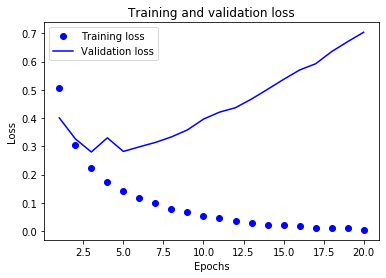

In [23]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1) # loss 개수 만큼 설정 epoch 개수를 설정

plt.plot(epochs, loss, 'bo', label='Training loss') # x축에 epochs 값으로, y축을 loss 값으로 설정
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs') # 축 라벨을 Epochs로 설정
plt.ylabel('Loss')
plt.legend()

plt.show()

- 위 그래프에서 훈련 loss는 계속해서 낮아지지만, 검증 loss는 상승하는 것을 볼 수 있다.
- 이는 Overfitting에 의해서 훈련 데이터에 너무 맞춰져있기 때문에 발생한 결과이다.

### 훈련, 검증 정확도 그리기

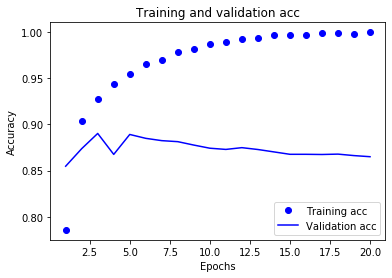

In [24]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1) # loss 개수 만큼 설정 epoch 개수를 설정

plt.plot(epochs, acc, 'bo', label='Training acc') # x축에 epochs 값으로, y축을 loss 값으로 설정
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs') # 축 라벨을 Epochs로 설정
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 모델을 처음부터 다시 훈련

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 122us/step - loss: 0.4446 - accuracy: 0.8166
Epoch 2/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.2560 - accuracy: 0.9093
Epoch 3/4
25000/25000 [==============================] - 4s 167us/step - loss: 0.1988 - accuracy: 0.9292
Epoch 4/4
25000/25000 [==============================] - 5s 195us/step


In [26]:
print("최종 결과: {}".format(result))

최종 결과: [0.2941011528635025, 0.8839200139045715]


- 최종 결과로 약 87%의 정확도를 달성하였다.

## 4.5. 훈련 모델로 새로운 데이터 에측하기

- predict 메서드를 사용해서 리뷰의 확률을 예측 가능

In [27]:
model.predict(x_test)

array([[0.11451009],
       [0.9994111 ],
       [0.7660862 ],
       ...,
       [0.09870643],
       [0.05049237],
       [0.503477  ]], dtype=float32)

## 4.6. 추가 실험

- 3개의 은닉층 사용
- 은닉 유닛 추가, 혹은 줄이기
- mse 손실 함수 사용
- tanh 함수 사용

In [28]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.MSE,
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.1231 - accuracy: 0.8301
Epoch 2/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.0651 - accuracy: 0.9133
Epoch 3/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.0522 - accuracy: 0.93300s - loss: 0.050
Epoch 4/4
25000/25000 [==============================] - 4s 175us/step


In [29]:
print("최종 결과: {}".format(result))

최종 결과: [0.09641224736481906, 0.8741199970245361]


In [30]:
model.predict(x_test)

array([[0.0307039 ],
       [0.9979006 ],
       [0.98188525],
       ...,
       [0.05815109],
       [0.05104753],
       [0.08186865]], dtype=float32)

## 4.7. 정리

- 원본 데이터를 신경망에 텐서로 주입하려면 전처리가 많이 필요하다.
- 출력 클래스가 2개인 이진 분류 문제에서는 하나의 유닛과 sigmoid 함수를 가진 Dense 층으로 끝나야 한다.

# 5. 뉴스 기사 분류: 다중 분류 문제

- 2개 이상의 클래스가 있을 때의 분류 문제
- 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망

## 5.1. 로이터 데이터셋

- 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽 집합
- 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.
- 어떤 토픽은 다른 것에 비해서 많은 데이터를 가지고 있다.


### 로이터 데이터셋 로드

In [31]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

- 8,982개의 훈련 샘플, 2,246개의 테스트 샘플
- IMDB 리뷰처럼 각 샘플을 정수 리스트

In [32]:
print("훈련 데이터의 개수: {}".format(len(train_data)))
print("테스트 데이터의 개수: {}".format(len(test_data)))
print("샘플의 예 : {}".format(train_data[0]))

훈련 데이터의 개수: 8982
테스트 데이터의 개수: 2246
샘플의 예 : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


### 데이터 디코딩

1. 단어와 인덱스가 저장 되어있는 딕셔너리 불러오기
2. 딕셔너리의 키와 밸류를 get 메서드로 가져 오기 쉽게 위치 변경
3. 데이터에 있는 문장을 띄어쓰기를 기준으로 나누어 get 메서드로 탐색 없는 경우 ?를 출력하게 한다.

In [33]:
word_index = reuters.get_word_index() # 단어와 인덱스를 가지고 있는 딕셔너리 데이터 가져오기
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 단어와 인덱스의 위치를 변경
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 0, 1, 2 는 패딩, 문서 시작, 사전에 없음을 위한 인덱스 임으로 뺴준다.

print("0 번 train_data 내용: {}".format(train_data[0]))
print("디코딩한 0 번 train_data 내용: {}".format(decoded_newswire))

0 번 train_data 내용: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
디코딩한 0 번 train_data 내용: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# 5.2. 데이터 준비

- 이전 예제와 동일한 코드를 사용하여 데이터를 벡터로 변환

In [34]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### 레이블 변경

- 레이블 을 벡터로 변경하는 방법
    1. 레이블 리스트를 정수 텐서로 변환
    2. 원-핫 인코딩 사용
    

### 레이블을 원-핫 인코딩으로 변경

In [35]:
# 함수로 원-핫 인코딩 구현
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
        
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [36]:
# 케라스 내장 함수를 사용하여 변경

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 5.3. 모델 구성

- 출력 클래스가 총 46개
- 16개의 차원은 46개의 클래스를 표현하기에는 제약이 많다.
- 64개의 은닉 노드 사용

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 다중 분류이므로 softmax를 사용하여 각 클래스에 대해서 확률을 구한다.

- 이 모델에서 사용할 손실 함수는 categoical_crossentropy이다. -> 다중 분류에서 사용되는 crossentropy
- 위 손실 함수는 두 확률 분포 사이의 거리를 측정 

In [38]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 5.4. 훈련 검증

- 1,000 개의 샘플을 따로 떼어서 검증 세트로 사용

In [39]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

- 완성한 모델을 epoch=20번 훈련

In [40]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                    batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 173us/step - loss: 2.5706 - accuracy: 0.4957 - val_loss: 1.7075 - val_accuracy: 0.6510
Epoch 2/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.4014 - accuracy: 0.7116 - val_loss: 1.3063 - val_accuracy: 0.7290
Epoch 3/20
7982/7982 [==============================] - 1s 143us/step - loss: 1.0402 - accuracy: 0.7830 - val_loss: 1.1303 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.8244 - accuracy: 0.8250 - val_loss: 1.0299 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.6573 - accuracy: 0.8601 - val_loss: 0.9825 - val_accuracy: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.5313 - accuracy: 0.8894 - val_loss: 0.9494 - val_accuracy: 0.7920
Epoch 7/20
7982/7982 [==============================] - 2s 197us/step - loss

### 훈련과 검증 손실 그리기

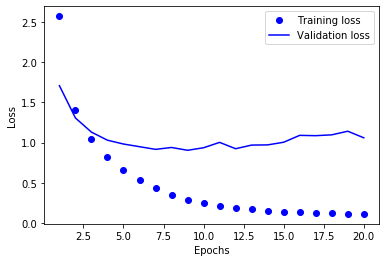

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

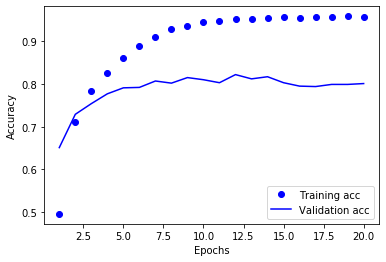

In [42]:
plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 이 모델은 대충 5번째 이후 과대적합이 발생


### 7번의 epoch를 가진 새로운 모델 훈련 및 테스트 세트에서 평가

In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=7,
                    batch_size=512,
                   validation_data=(x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

print("최종 결과 : {}".format(result))

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 178us/step - loss: 2.7354 - accuracy: 0.5185 - val_loss: 1.8220 - val_accuracy: 0.6220
Epoch 2/7
7982/7982 [==============================] - 1s 153us/step - loss: 1.4858 - accuracy: 0.7031 - val_loss: 1.3274 - val_accuracy: 0.7150
Epoch 3/7
7982/7982 [==============================] - 1s 155us/step - loss: 1.0816 - accuracy: 0.7755 - val_loss: 1.1351 - val_accuracy: 0.7720
Epoch 4/7
7982/7982 [==============================] - 1s 148us/step - loss: 0.8462 - accuracy: 0.8245 - val_loss: 1.0356 - val_accuracy: 0.7850
Epoch 5/7
7982/7982 [==============================] - 1s 158us/step - loss: 0.6700 - accuracy: 0.8622 - val_loss: 0.9590 - val_accuracy: 0.7990
Epoch 6/7
7982/7982 [==============================] - 1s 148us/step - loss: 0.5350 - accuracy: 0.8874 - val_loss: 0.9278 - val_accuracy: 0.8090
Epoch 7/7
2246/2246 [==============================] - 1s 244us/step
최종 결과 : [0.97

최종적으로 테스트 셋의 정확도는 약 79% 정도로 나왔다.

## 5.5. 새로운 데이터에 대해 예측하기

In [44]:
predictions = model.predict(x_test)

In [45]:
print('prediction의 길이: {}'.format(predictions.shape))
print('prediction의 원소들의 합: {}'.format(np.sum(predictions[0])))
print('prediction의 예측 클래스: {}'.format(np.argmax(predictions[0])))

prediction의 길이: (2246, 46)
prediction의 원소들의 합: 0.9999999403953552
prediction의 예측 클래스: 3


## 5.6. 레이블과 손실을 다루는 다른 방법

- 레이블을 인코딩하는 다른 방법을 소개
- 바뀐 방법에 의한 사용해야 되는 손실 함수 소개

In [46]:
# 정수 텐서로 변환

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [47]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

- sparse_categorical_entropy 함수는 인터페이스만 다를 뿐 수학적으로는 같은 기능을 한다.

## 5.7. 충분히 큰 중간층을 두어야 하는 이유

- 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어지만 안된다.
- 만약 많이 작아진다면 정보의 병목이 일어날 수 있기 떄문이다.

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 중간의 히든 유닛이 4개로 변경됨
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                    batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 3.4515 - accuracy: 0.2028 - val_loss: 3.0879 - val_accuracy: 0.3600
Epoch 2/20
7982/7982 [==============================] - 1s 153us/step - loss: 2.8114 - accuracy: 0.3740 - val_loss: 2.5658 - val_accuracy: 0.3810
Epoch 3/20
7982/7982 [==============================] - 1s 153us/step - loss: 2.3215 - accuracy: 0.3926 - val_loss: 2.1787 - val_accuracy: 0.3920
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.9729 - accuracy: 0.4107 - val_loss: 1.9222 - val_accuracy: 0.4100
Epoch 5/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.7243 - accuracy: 0.4817 - val_loss: 1.7370 - val_accuracy: 0.5610
Epoch 6/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.5320 - accuracy: 0.6220 - val_loss: 1.6103 - val_accuracy: 0.5980
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss

- 검증 정확도가 78%에서 71%로 감소하였다.
- 위와 같은 현상이 나타나는 이유는 많은 정보를 저차원 표현 공간으로 압축하려 했기 때문이다.

# 6. 주택 가격 예측: 회귀 문제

- 회귀문제
    - 개별적인 레이블 대신 연속적인 값을 예측하는 문제

## 6.1. 보스턴 주택 가격 데이터셋

- 506개의 데이터 셋
- 404개의 훈련 샘플, 102개의 테스트 샘플
- 입력 데이터에 있는 각 특성은 스케일이 서로 다르다.


### 데이터 셋 로드

In [49]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("훈련 데이터 크기: {}".format(train_data.shape))
print("테스트 데이터 크기: {}".format(test_data.shape))
print("타겟 데이터: {}".format(train_targets))

훈련 데이터 크기: (404, 13)
테스트 데이터 크기: (102, 13)
타겟 데이터: [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4

## 6.2. 데이터 준비

- 서로 다른 데이터 스캐일을 입력 데이터로하면 문제가 생김
- 이런 문제점을 해결하기 위해서 특성별로 정규화를 진행


- 정규화 방법
    - 각 특성에 대해서 특성의 평균을 빼고 표준 편차로 나눈다.
    - 이러한 방법을 쓰면 특성의 중앙이 0근처에 맞추어지고 표준 편차가 1이 된다.
    - 이 방법은 밑바닥부터 시작하는 딥러닝에 자세히 서술 되어있다.

In [50]:
mean = train_data.mean(axis=0) # 입력 데이터의 첫 번째 축을 기준으로 평균을 구한다. -> 첫 번째 축은 각 특성들이다.
train_data -= mean
std = train_data.std(axis=0) # 표준 편차를 구함
train_data /= std

test_data -= mean
test_data /= std

- 테스트 데이터를 정규화할 때 사용한 값은 훈련 데이터에서 계산한 값이다.
- 작업 과정에서 테스트 데이터에서 계산한 어떤 값도 사용하면 안된다.

## 6.3. 모델 구성

- 샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크 구성
- 샘플 개수가 작을 때 작은 네트워크를 사용하는것은 오버 피팅을 피하는 한가지 방법이다.

In [51]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae'])
    return model

- 마지막 층에는 활성화 함수가 사용되지 않았다.
    - 이 모델은 순수한 선형값을 출력하므로 값을 제한하는 활성화 함수를 사용하지 않는다.
    
    
- 손실 함수로는 mse(평균 제곱 오차)를 사용했다.
    - 회귀 문제에서 널리 사용되며 예측값과 타깃 값 사이의 거리의 절대값을 줄이는 방식이다.

## 6.4. K-겹 검증을 사용한 훈련 검증

- 훈련에 사용하는 데이터가 너무 적으면 과대 적합이 될 가능성이 매우 높다.
- 따라서 이를 k개로 나누어서 그 중 한개를 검증 데이터로 사용하고, 이를 k 번 반복하여 평균을 내는 방법이다.


- k-겹 검증의 예시
![k_fold](./images/kfold.jpg)


### K-겹 검증하기

In [52]:
k = 4 

num_val_samples = len(train_data) // k # 전체 데이터 개수를 k로 나눈 몫
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # np.concatenate는 배열을 축을 기준으로 합치는 기능을 한다.
    # 밑의 예는 검증 데이터 부분을 제외하고 훈련 데이터를 합치는 경우이다.
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples :]],
    axis=0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples :]],
    axis=0)
    
    model = build_model()
    model.fit(partial_train_data,
            partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs,
            batch_size=1,
            verbose=1)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # 검증 셋으로 평가
    all_scores.append(val_mae) # 평가 기준의 값을 넣어놓음

처리중인 폴드 # 0
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 2s 5ms/step - loss: 212.6824 - mae: 10.7864 - val_loss: 35.7141 - val_mae: 3.9395
Epoch 2/100
303/303 [==============================] - 1s 5ms/step - loss: 29.0113 - mae: 3.8039 - val_loss: 21.6640 - val_mae: 3.2911
Epoch 3/100
303/303 [==============================] - 1s 4ms/step - loss: 20.6542 - mae: 3.1868 - val_loss: 16.2293 - val_mae: 2.5520
Epoch 4/100
303/303 [==============================] - 2s 5ms/step - loss: 17.3474 - mae: 2.8712 - val_loss: 17.4805 - val_mae: 3.1770
Epoch 5/100
303/303 [==============================] - 2s 5ms/step - loss: 15.3951 - mae: 2.7805 - val_loss: 15.5781 - val_mae: 2.4625
Epoch 6/100
303/303 [==============================] - 1s 5ms/step - loss: 15.0220 - mae: 2.6183 - val_loss: 13.5774 - val_mae: 2.4183
Epoch 7/100
303/303 [==============================] - 1s 5ms/step - loss: 14.2783 - mae: 2.5011 - val_loss: 11.7695 - val_mae: 2.

303/303 [==============================] - 1s 4ms/step - loss: 6.1532 - mae: 1.5909 - val_loss: 8.7565 - val_mae: 1.9500
Epoch 62/100
303/303 [==============================] - 1s 5ms/step - loss: 6.0981 - mae: 1.5953 - val_loss: 9.5242 - val_mae: 2.3306
Epoch 63/100
303/303 [==============================] - 1s 4ms/step - loss: 6.4944 - mae: 1.6123 - val_loss: 9.2905 - val_mae: 2.1409
Epoch 64/100
303/303 [==============================] - 1s 4ms/step - loss: 6.3555 - mae: 1.5821 - val_loss: 8.1460 - val_mae: 1.8597
Epoch 65/100
303/303 [==============================] - 1s 4ms/step - loss: 6.2413 - mae: 1.6373 - val_loss: 9.7485 - val_mae: 2.3040
Epoch 66/100
303/303 [==============================] - 1s 4ms/step - loss: 5.8785 - mae: 1.6485 - val_loss: 7.4815 - val_mae: 1.9688
Epoch 67/100
303/303 [==============================] - 1s 4ms/step - loss: 6.1411 - mae: 1.5342 - val_loss: 9.1457 - val_mae: 2.2325
Epoch 68/100
303/303 [==============================] - 1s 4ms/step - loss:

303/303 [==============================] - 1s 4ms/step - loss: 9.0820 - mae: 2.0080 - val_loss: 11.1238 - val_mae: 2.5629
Epoch 22/100
303/303 [==============================] - 1s 5ms/step - loss: 8.8304 - mae: 1.9688 - val_loss: 13.7528 - val_mae: 2.8780
Epoch 23/100
303/303 [==============================] - 1s 4ms/step - loss: 8.6346 - mae: 1.9371 - val_loss: 11.2744 - val_mae: 2.5787
Epoch 24/100
303/303 [==============================] - 1s 5ms/step - loss: 8.5104 - mae: 1.9102 - val_loss: 12.2124 - val_mae: 2.7111
Epoch 25/100
303/303 [==============================] - 1s 4ms/step - loss: 8.0943 - mae: 1.9081 - val_loss: 10.8469 - val_mae: 2.4710
Epoch 26/100
303/303 [==============================] - 1s 4ms/step - loss: 8.3323 - mae: 1.8730 - val_loss: 12.7059 - val_mae: 2.7576
Epoch 27/100
303/303 [==============================] - 1s 5ms/step - loss: 8.3219 - mae: 1.8802 - val_loss: 14.1493 - val_mae: 2.9101
Epoch 28/100
303/303 [==============================] - 1s 4ms/step 

Epoch 82/100
303/303 [==============================] - 1s 4ms/step - loss: 4.5724 - mae: 1.4172 - val_loss: 15.4558 - val_mae: 2.7504
Epoch 83/100
303/303 [==============================] - 1s 5ms/step - loss: 4.1686 - mae: 1.4149 - val_loss: 14.2928 - val_mae: 2.5201
Epoch 84/100
303/303 [==============================] - 1s 4ms/step - loss: 4.7395 - mae: 1.4415 - val_loss: 13.1784 - val_mae: 2.3851
Epoch 85/100
303/303 [==============================] - 1s 5ms/step - loss: 4.5112 - mae: 1.3805 - val_loss: 16.4868 - val_mae: 2.7102
Epoch 86/100
303/303 [==============================] - 1s 5ms/step - loss: 4.0615 - mae: 1.3265 - val_loss: 14.1165 - val_mae: 2.5150
Epoch 87/100
303/303 [==============================] - 1s 5ms/step - loss: 4.2858 - mae: 1.4036 - val_loss: 14.7356 - val_mae: 2.5102
Epoch 88/100
303/303 [==============================] - 1s 5ms/step - loss: 4.2126 - mae: 1.4238 - val_loss: 13.6752 - val_mae: 2.4810
Epoch 89/100
303/303 [==============================] -

303/303 [==============================] - 2s 8ms/step - loss: 5.6710 - mae: 1.6567 - val_loss: 14.7099 - val_mae: 2.6983
Epoch 43/100
303/303 [==============================] - 1s 5ms/step - loss: 5.3858 - mae: 1.6353 - val_loss: 15.6428 - val_mae: 2.6580
Epoch 44/100
303/303 [==============================] - 1s 4ms/step - loss: 5.6065 - mae: 1.6379 - val_loss: 16.3400 - val_mae: 2.8743
Epoch 45/100
303/303 [==============================] - 2s 6ms/step - loss: 5.4872 - mae: 1.6673 - val_loss: 14.3847 - val_mae: 2.5381
Epoch 46/100
303/303 [==============================] - 2s 7ms/step - loss: 5.4785 - mae: 1.5809 - val_loss: 15.5045 - val_mae: 2.7961
Epoch 47/100
303/303 [==============================] - 1s 4ms/step - loss: 5.2727 - mae: 1.5909 - val_loss: 15.1378 - val_mae: 2.6355
Epoch 48/100
303/303 [==============================] - 1s 5ms/step - loss: 5.4307 - mae: 1.6473 - val_loss: 15.2929 - val_mae: 2.6520
Epoch 49/100
303/303 [==============================] - 1s 5ms/step 

303/303 [==============================] - 1s 4ms/step - loss: 29.3086 - mae: 3.6063 - val_loss: 38.6361 - val_mae: 4.0614
Epoch 3/100
303/303 [==============================] - 1s 4ms/step - loss: 20.3175 - mae: 2.9676 - val_loss: 32.2692 - val_mae: 3.5647
Epoch 4/100
303/303 [==============================] - 2s 8ms/step - loss: 16.3524 - mae: 2.6906 - val_loss: 28.4570 - val_mae: 3.2813
Epoch 5/100
303/303 [==============================] - 2s 6ms/step - loss: 14.9305 - mae: 2.4688 - val_loss: 24.8676 - val_mae: 3.3314
Epoch 6/100
303/303 [==============================] - 2s 6ms/step - loss: 14.1419 - mae: 2.4670 - val_loss: 22.9446 - val_mae: 3.0128
Epoch 7/100
303/303 [==============================] - 1s 4ms/step - loss: 12.7610 - mae: 2.3921 - val_loss: 22.8776 - val_mae: 2.8375
Epoch 8/100
303/303 [==============================] - 1s 4ms/step - loss: 12.1891 - mae: 2.1912 - val_loss: 23.4108 - val_mae: 2.9287
Epoch 9/100
303/303 [==============================] - 1s 4ms/step 

Epoch 63/100
303/303 [==============================] - 1s 4ms/step - loss: 4.8526 - mae: 1.4918 - val_loss: 10.3944 - val_mae: 2.2960
Epoch 64/100
303/303 [==============================] - 1s 4ms/step - loss: 4.8945 - mae: 1.4444 - val_loss: 11.0081 - val_mae: 2.3437
Epoch 65/100
303/303 [==============================] - 1s 4ms/step - loss: 5.3497 - mae: 1.4678 - val_loss: 10.0847 - val_mae: 2.2447
Epoch 66/100
303/303 [==============================] - 1s 4ms/step - loss: 4.4954 - mae: 1.4161 - val_loss: 11.8586 - val_mae: 2.4088
Epoch 67/100
303/303 [==============================] - 1s 4ms/step - loss: 4.6254 - mae: 1.4353 - val_loss: 11.3997 - val_mae: 2.3803
Epoch 68/100
303/303 [==============================] - 1s 4ms/step - loss: 4.8282 - mae: 1.4876 - val_loss: 9.9553 - val_mae: 2.1954
Epoch 69/100
303/303 [==============================] - 1s 4ms/step - loss: 4.4354 - mae: 1.4274 - val_loss: 11.1787 - val_mae: 2.3225
Epoch 70/100
303/303 [==============================] - 

In [53]:
print("스코어들 : {}".format(all_scores))
print("스코어 평균 : {}".format(np.mean(all_scores)))

스코어들 : [2.016528606414795, 2.7032535076141357, 2.65431809425354, 2.4627556800842285]
스코어 평균 : 2.459213972091675


- 검증 셋이 1.8 ~ 2.68로 차이가 크다.
- 신경망을 더 오래 500 epochs 학습
- 각 에포크마다 모델이 얼마나 개선되는지 기록하기 위해 에포크의 검증 점수를 로그에 저장


### 각 폴드에서 검증 점수를 로그에 저장하기

In [63]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    
    print('처리중인 폴드 #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()  # 케라스 모델 구성(컴파일 포함)
    
    history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=1)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 4ms/step - loss: 205.1945 - mae: 10.7458 - val_loss: 44.3260 - val_mae: 4.4879
Epoch 2/500
303/303 [==============================] - 1s 4ms/step - loss: 34.7797 - mae: 4.1088 - val_loss: 25.2033 - val_mae: 3.1992
Epoch 3/500
303/303 [==============================] - 1s 4ms/step - loss: 23.3008 - mae: 3.3417 - val_loss: 20.1533 - val_mae: 2.8166
Epoch 4/500
303/303 [==============================] - 1s 4ms/step - loss: 18.5448 - mae: 2.8837 - val_loss: 16.2128 - val_mae: 2.7140
Epoch 5/500
303/303 [==============================] - 1s 4ms/step - loss: 16.3222 - mae: 2.7108 - val_loss: 14.5544 - val_mae: 2.4542
Epoch 6/500
303/303 [==============================] - 1s 4ms/step - loss: 14.9638 - mae: 2.5335 - val_loss: 13.9800 - val_mae: 2.3966
Epoch 7/500
303/303 [==============================] - 1s 4ms/step - loss: 14.4455 - mae: 2.4631 - val_loss: 14.5537 - val_mae: 2.

303/303 [==============================] - 2s 7ms/step - loss: 6.5778 - mae: 1.6758 - val_loss: 6.4843 - val_mae: 1.8350
Epoch 62/500
303/303 [==============================] - 1s 4ms/step - loss: 6.4258 - mae: 1.6409 - val_loss: 7.7162 - val_mae: 1.9107
Epoch 63/500
303/303 [==============================] - 1s 4ms/step - loss: 6.1991 - mae: 1.6359 - val_loss: 7.8858 - val_mae: 1.9862
Epoch 64/500
303/303 [==============================] - 1s 4ms/step - loss: 6.1996 - mae: 1.6163 - val_loss: 8.7629 - val_mae: 2.0454
Epoch 65/500
303/303 [==============================] - 1s 4ms/step - loss: 5.8694 - mae: 1.6044 - val_loss: 6.8579 - val_mae: 1.8309
Epoch 66/500
303/303 [==============================] - 1s 4ms/step - loss: 6.1307 - mae: 1.5524 - val_loss: 7.3477 - val_mae: 2.0070
Epoch 67/500
303/303 [==============================] - 2s 6ms/step - loss: 5.7801 - mae: 1.5590 - val_loss: 6.8265 - val_mae: 1.7342
Epoch 68/500
303/303 [==============================] - 1s 4ms/step - loss:

303/303 [==============================] - 1s 4ms/step - loss: 3.8260 - mae: 1.2705 - val_loss: 8.2782 - val_mae: 2.3016
Epoch 123/500
303/303 [==============================] - 1s 4ms/step - loss: 3.9785 - mae: 1.3129 - val_loss: 7.2744 - val_mae: 1.9378
Epoch 124/500
303/303 [==============================] - 1s 4ms/step - loss: 3.8857 - mae: 1.3005 - val_loss: 7.2044 - val_mae: 1.9145
Epoch 125/500
303/303 [==============================] - 1s 4ms/step - loss: 4.0123 - mae: 1.2300 - val_loss: 6.8607 - val_mae: 1.9500
Epoch 126/500
303/303 [==============================] - 1s 4ms/step - loss: 3.9258 - mae: 1.2870 - val_loss: 7.6347 - val_mae: 2.0094
Epoch 127/500
303/303 [==============================] - 1s 4ms/step - loss: 3.7461 - mae: 1.2727 - val_loss: 6.4663 - val_mae: 1.9403
Epoch 128/500
303/303 [==============================] - 1s 4ms/step - loss: 3.7107 - mae: 1.2626 - val_loss: 6.7967 - val_mae: 1.9626
Epoch 129/500
303/303 [==============================] - 1s 4ms/step 

Epoch 183/500
303/303 [==============================] - 1s 4ms/step - loss: 2.5649 - mae: 1.1879 - val_loss: 7.8726 - val_mae: 2.1595
Epoch 184/500
303/303 [==============================] - 1s 4ms/step - loss: 2.5416 - mae: 1.1314 - val_loss: 9.8340 - val_mae: 2.3907
Epoch 185/500
303/303 [==============================] - 1s 4ms/step - loss: 2.2462 - mae: 1.0590 - val_loss: 8.1366 - val_mae: 2.1552
Epoch 186/500
303/303 [==============================] - 1s 4ms/step - loss: 2.4330 - mae: 1.1380 - val_loss: 7.6164 - val_mae: 2.0835
Epoch 187/500
303/303 [==============================] - 1s 5ms/step - loss: 2.4754 - mae: 1.0718 - val_loss: 9.6400 - val_mae: 2.3652
Epoch 188/500
303/303 [==============================] - 1s 4ms/step - loss: 2.5475 - mae: 1.1348 - val_loss: 7.6423 - val_mae: 2.1014
Epoch 189/500
303/303 [==============================] - 1s 5ms/step - loss: 2.4050 - mae: 1.1143 - val_loss: 8.9179 - val_mae: 2.3473
Epoch 190/500
303/303 [==============================] 

303/303 [==============================] - 1s 4ms/step - loss: 2.0389 - mae: 1.0164 - val_loss: 9.0461 - val_mae: 2.2644
Epoch 244/500
303/303 [==============================] - 1s 4ms/step - loss: 1.6938 - mae: 0.9833 - val_loss: 8.9059 - val_mae: 2.2222
Epoch 245/500
303/303 [==============================] - 1s 4ms/step - loss: 1.9607 - mae: 0.9972 - val_loss: 10.5774 - val_mae: 2.5108
Epoch 246/500
303/303 [==============================] - 1s 4ms/step - loss: 2.0008 - mae: 1.0503 - val_loss: 9.2382 - val_mae: 2.3086
Epoch 247/500
303/303 [==============================] - 1s 5ms/step - loss: 1.8605 - mae: 0.9965 - val_loss: 8.6242 - val_mae: 2.2689
Epoch 248/500
303/303 [==============================] - 1s 4ms/step - loss: 1.8116 - mae: 0.9811 - val_loss: 8.8791 - val_mae: 2.3139
Epoch 249/500
303/303 [==============================] - 1s 5ms/step - loss: 1.9655 - mae: 1.0043 - val_loss: 7.9114 - val_mae: 2.1862
Epoch 250/500
303/303 [==============================] - 2s 5ms/step

303/303 [==============================] - 1s 4ms/step - loss: 1.3363 - mae: 0.8749 - val_loss: 11.7657 - val_mae: 2.5031
Epoch 304/500
303/303 [==============================] - 1s 4ms/step - loss: 1.5076 - mae: 0.8929 - val_loss: 9.7574 - val_mae: 2.3476
Epoch 305/500
303/303 [==============================] - 1s 5ms/step - loss: 1.3087 - mae: 0.8554 - val_loss: 12.1200 - val_mae: 2.4581
Epoch 306/500
303/303 [==============================] - 2s 5ms/step - loss: 1.6178 - mae: 0.9421 - val_loss: 11.1169 - val_mae: 2.5037
Epoch 307/500
303/303 [==============================] - 1s 5ms/step - loss: 1.4087 - mae: 0.8734 - val_loss: 10.0718 - val_mae: 2.3839
Epoch 308/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4135 - mae: 0.8562 - val_loss: 9.7511 - val_mae: 2.3883
Epoch 309/500
303/303 [==============================] - 2s 5ms/step - loss: 1.6124 - mae: 0.9355 - val_loss: 9.1679 - val_mae: 2.3203
Epoch 310/500
303/303 [==============================] - 1s 5ms/s

303/303 [==============================] - 1s 4ms/step - loss: 1.2505 - mae: 0.8374 - val_loss: 11.5455 - val_mae: 2.5396
Epoch 364/500
303/303 [==============================] - 1s 5ms/step - loss: 1.2890 - mae: 0.8385 - val_loss: 10.4298 - val_mae: 2.3991
Epoch 365/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3767 - mae: 0.8103 - val_loss: 9.7382 - val_mae: 2.3301
Epoch 366/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0519 - mae: 0.7599 - val_loss: 10.1609 - val_mae: 2.3882
Epoch 367/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2977 - mae: 0.8427 - val_loss: 10.7798 - val_mae: 2.5917
Epoch 368/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2915 - mae: 0.8186 - val_loss: 10.0579 - val_mae: 2.4106
Epoch 369/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0592 - mae: 0.7499 - val_loss: 9.1739 - val_mae: 2.2505
Epoch 370/500
303/303 [==============================] - 1s 4ms/

303/303 [==============================] - 1s 4ms/step - loss: 1.1251 - mae: 0.7552 - val_loss: 10.9310 - val_mae: 2.4071
Epoch 424/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0939 - mae: 0.7411 - val_loss: 9.6156 - val_mae: 2.2445
Epoch 425/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0612 - mae: 0.7504 - val_loss: 11.1129 - val_mae: 2.4912
Epoch 426/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9867 - mae: 0.7313 - val_loss: 11.1407 - val_mae: 2.5121
Epoch 427/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1302 - mae: 0.7679 - val_loss: 8.9139 - val_mae: 2.2218
Epoch 428/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9503 - mae: 0.7296 - val_loss: 9.0943 - val_mae: 2.1984
Epoch 429/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0620 - mae: 0.7473 - val_loss: 9.8676 - val_mae: 2.2461
Epoch 430/500
303/303 [==============================] - 1s 4ms/st

303/303 [==============================] - 1s 4ms/step - loss: 0.9186 - mae: 0.7048 - val_loss: 10.4772 - val_mae: 2.3288
Epoch 484/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9115 - mae: 0.6966 - val_loss: 10.2844 - val_mae: 2.3159
Epoch 485/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8999 - mae: 0.6669 - val_loss: 12.5189 - val_mae: 2.6214
Epoch 486/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9585 - mae: 0.7204 - val_loss: 9.5305 - val_mae: 2.1539
Epoch 487/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7531 - mae: 0.6314 - val_loss: 11.1984 - val_mae: 2.3431
Epoch 488/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9911 - mae: 0.7268 - val_loss: 10.2159 - val_mae: 2.3132
Epoch 489/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8541 - mae: 0.6973 - val_loss: 9.7044 - val_mae: 2.1854
Epoch 490/500
303/303 [==============================] - 1s 4ms/

303/303 [==============================] - 1s 5ms/step - loss: 7.3037 - mae: 1.7298 - val_loss: 8.5664 - val_mae: 2.2672
Epoch 44/500
303/303 [==============================] - 1s 4ms/step - loss: 7.3492 - mae: 1.7224 - val_loss: 7.6940 - val_mae: 2.1035
Epoch 45/500
303/303 [==============================] - 1s 5ms/step - loss: 7.0605 - mae: 1.7551 - val_loss: 8.1833 - val_mae: 2.1875
Epoch 46/500
303/303 [==============================] - 1s 4ms/step - loss: 7.5393 - mae: 1.7732 - val_loss: 7.8799 - val_mae: 2.1736
Epoch 47/500
303/303 [==============================] - 1s 5ms/step - loss: 6.7548 - mae: 1.6870 - val_loss: 10.9486 - val_mae: 2.5065
Epoch 48/500
303/303 [==============================] - 1s 4ms/step - loss: 7.3394 - mae: 1.7426 - val_loss: 8.2367 - val_mae: 2.1573
Epoch 49/500
303/303 [==============================] - 1s 4ms/step - loss: 6.8591 - mae: 1.7305 - val_loss: 8.4864 - val_mae: 2.2244
Epoch 50/500
303/303 [==============================] - 1s 4ms/step - loss

303/303 [==============================] - 1s 4ms/step - loss: 4.3346 - mae: 1.3945 - val_loss: 13.4565 - val_mae: 2.7538
Epoch 105/500
303/303 [==============================] - 1s 5ms/step - loss: 3.9183 - mae: 1.3440 - val_loss: 10.2604 - val_mae: 2.3483
Epoch 106/500
303/303 [==============================] - 1s 5ms/step - loss: 4.2103 - mae: 1.3332 - val_loss: 11.4249 - val_mae: 2.4272
Epoch 107/500
303/303 [==============================] - 1s 5ms/step - loss: 4.3268 - mae: 1.3721 - val_loss: 9.1698 - val_mae: 2.1851
Epoch 108/500
303/303 [==============================] - 1s 4ms/step - loss: 4.1768 - mae: 1.3696 - val_loss: 10.8163 - val_mae: 2.3925
Epoch 109/500
303/303 [==============================] - 1s 4ms/step - loss: 4.2202 - mae: 1.3548 - val_loss: 10.3801 - val_mae: 2.4139
Epoch 110/500
303/303 [==============================] - 1s 4ms/step - loss: 3.6815 - mae: 1.3363 - val_loss: 10.6642 - val_mae: 2.3863
Epoch 111/500
303/303 [==============================] - 1s 4ms

303/303 [==============================] - 1s 4ms/step - loss: 3.0207 - mae: 1.1814 - val_loss: 14.6860 - val_mae: 2.5425
Epoch 165/500
303/303 [==============================] - 1s 4ms/step - loss: 2.7491 - mae: 1.1640 - val_loss: 14.8440 - val_mae: 2.6335
Epoch 166/500
303/303 [==============================] - 1s 4ms/step - loss: 3.0001 - mae: 1.2007 - val_loss: 12.4506 - val_mae: 2.4458
Epoch 167/500
303/303 [==============================] - 1s 4ms/step - loss: 2.7695 - mae: 1.1288 - val_loss: 14.8849 - val_mae: 2.6175
Epoch 168/500
303/303 [==============================] - 1s 4ms/step - loss: 2.8298 - mae: 1.1320 - val_loss: 13.4764 - val_mae: 2.5748
Epoch 169/500
303/303 [==============================] - 1s 4ms/step - loss: 2.7539 - mae: 1.1378 - val_loss: 16.0225 - val_mae: 2.5906
Epoch 170/500
303/303 [==============================] - 1s 5ms/step - loss: 2.6764 - mae: 1.1160 - val_loss: 13.1084 - val_mae: 2.5441
Epoch 171/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.8512 - mae: 0.9933 - val_loss: 17.0553 - val_mae: 2.6363
Epoch 225/500
303/303 [==============================] - 1s 5ms/step - loss: 2.0143 - mae: 1.0252 - val_loss: 20.4165 - val_mae: 3.0103
Epoch 226/500
303/303 [==============================] - 1s 4ms/step - loss: 2.2806 - mae: 1.0495 - val_loss: 16.7474 - val_mae: 2.7922
Epoch 227/500
303/303 [==============================] - 1s 4ms/step - loss: 1.6448 - mae: 0.9406 - val_loss: 27.0933 - val_mae: 3.1611
Epoch 228/500
303/303 [==============================] - 1s 4ms/step - loss: 2.0007 - mae: 1.0171 - val_loss: 14.9852 - val_mae: 2.5999
Epoch 229/500
303/303 [==============================] - 1s 5ms/step - loss: 1.8005 - mae: 0.9675 - val_loss: 21.3767 - val_mae: 2.8319
Epoch 230/500
303/303 [==============================] - 1s 4ms/step - loss: 1.8926 - mae: 0.9828 - val_loss: 24.4153 - val_mae: 3.2793
Epoch 231/500
303/303 [==============================] - 2s 5m

303/303 [==============================] - 1s 5ms/step - loss: 1.4781 - mae: 0.8715 - val_loss: 25.4237 - val_mae: 3.3780
Epoch 285/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3728 - mae: 0.9085 - val_loss: 16.5200 - val_mae: 2.7188
Epoch 286/500
303/303 [==============================] - 1s 5ms/step - loss: 1.4514 - mae: 0.8739 - val_loss: 23.1972 - val_mae: 2.9269
Epoch 287/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4793 - mae: 0.8622 - val_loss: 22.3921 - val_mae: 2.9679
Epoch 288/500
303/303 [==============================] - 1s 5ms/step - loss: 1.5654 - mae: 0.9167 - val_loss: 25.1238 - val_mae: 3.1727
Epoch 289/500
303/303 [==============================] - 2s 5ms/step - loss: 1.4955 - mae: 0.8920 - val_loss: 24.6781 - val_mae: 3.2868
Epoch 290/500
303/303 [==============================] - 1s 5ms/step - loss: 1.3952 - mae: 0.9256 - val_loss: 20.1013 - val_mae: 2.8753
Epoch 291/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.1493 - mae: 0.7863 - val_loss: 19.6163 - val_mae: 2.7363
Epoch 345/500
303/303 [==============================] - 1s 5ms/step - loss: 1.1979 - mae: 0.8195 - val_loss: 20.0109 - val_mae: 2.8071
Epoch 346/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2931 - mae: 0.8151 - val_loss: 17.6828 - val_mae: 2.7533
Epoch 347/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2308 - mae: 0.8337 - val_loss: 16.3480 - val_mae: 2.6109
Epoch 348/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3258 - mae: 0.8644 - val_loss: 24.3250 - val_mae: 3.0227
Epoch 349/500
303/303 [==============================] - 1s 5ms/step - loss: 1.1237 - mae: 0.7933 - val_loss: 22.1341 - val_mae: 2.9682
Epoch 350/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3211 - mae: 0.8329 - val_loss: 18.4149 - val_mae: 2.5955
Epoch 351/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.1669 - mae: 0.7787 - val_loss: 21.5472 - val_mae: 3.1340
Epoch 405/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0240 - mae: 0.7773 - val_loss: 18.4203 - val_mae: 2.7984
Epoch 406/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9840 - mae: 0.7178 - val_loss: 22.4781 - val_mae: 3.1653
Epoch 407/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1150 - mae: 0.7888 - val_loss: 16.1387 - val_mae: 2.6720
Epoch 408/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0583 - mae: 0.7480 - val_loss: 16.2151 - val_mae: 2.6027
Epoch 409/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9393 - mae: 0.7414 - val_loss: 21.0074 - val_mae: 2.8783
Epoch 410/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0870 - mae: 0.7736 - val_loss: 18.0898 - val_mae: 2.7192
Epoch 411/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.9844 - mae: 0.7508 - val_loss: 18.1637 - val_mae: 2.7533
Epoch 465/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9394 - mae: 0.7333 - val_loss: 19.5627 - val_mae: 2.8059
Epoch 466/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8910 - mae: 0.6885 - val_loss: 18.8480 - val_mae: 2.8912
Epoch 467/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9126 - mae: 0.7147 - val_loss: 16.9620 - val_mae: 2.6190
Epoch 468/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9684 - mae: 0.7402 - val_loss: 15.3757 - val_mae: 2.5758
Epoch 469/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9264 - mae: 0.7029 - val_loss: 19.4195 - val_mae: 2.8738
Epoch 470/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8349 - mae: 0.6598 - val_loss: 18.1127 - val_mae: 2.7462
Epoch 471/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 7.6929 - mae: 1.8053 - val_loss: 14.4970 - val_mae: 2.5600
Epoch 25/500
303/303 [==============================] - 1s 5ms/step - loss: 7.0483 - mae: 1.8713 - val_loss: 15.9754 - val_mae: 2.5832
Epoch 26/500
303/303 [==============================] - 1s 4ms/step - loss: 6.8189 - mae: 1.8371 - val_loss: 15.5651 - val_mae: 2.5528
Epoch 27/500
303/303 [==============================] - 1s 4ms/step - loss: 7.2088 - mae: 1.8306 - val_loss: 16.1994 - val_mae: 2.7720
Epoch 28/500
303/303 [==============================] - 1s 5ms/step - loss: 6.9615 - mae: 1.8121 - val_loss: 15.6584 - val_mae: 2.5393
Epoch 29/500
303/303 [==============================] - 1s 4ms/step - loss: 6.8257 - mae: 1.7631 - val_loss: 15.5479 - val_mae: 2.5974
Epoch 30/500
303/303 [==============================] - 1s 5ms/step - loss: 6.6672 - mae: 1.7990 - val_loss: 14.5704 - val_mae: 2.5475
Epoch 31/500
303/303 [==============================] - 1s 4ms/step 

Epoch 85/500
303/303 [==============================] - 1s 5ms/step - loss: 3.2360 - mae: 1.2721 - val_loss: 15.8120 - val_mae: 2.6692
Epoch 86/500
303/303 [==============================] - 1s 4ms/step - loss: 3.4133 - mae: 1.3046 - val_loss: 15.4564 - val_mae: 2.6232
Epoch 87/500
303/303 [==============================] - 1s 4ms/step - loss: 3.3011 - mae: 1.2879 - val_loss: 15.8839 - val_mae: 2.8448
Epoch 88/500
303/303 [==============================] - 1s 4ms/step - loss: 3.2588 - mae: 1.2929 - val_loss: 14.6001 - val_mae: 2.6541
Epoch 89/500
303/303 [==============================] - 1s 4ms/step - loss: 3.1638 - mae: 1.2982 - val_loss: 14.9274 - val_mae: 2.5066
Epoch 90/500
303/303 [==============================] - 1s 4ms/step - loss: 3.3692 - mae: 1.3010 - val_loss: 14.8750 - val_mae: 2.5645
Epoch 91/500
303/303 [==============================] - 1s 4ms/step - loss: 3.2996 - mae: 1.2715 - val_loss: 15.7795 - val_mae: 2.6769
Epoch 92/500
303/303 [==============================] -

303/303 [==============================] - 1s 5ms/step - loss: 1.9101 - mae: 0.9411 - val_loss: 15.3611 - val_mae: 2.6236
Epoch 146/500
303/303 [==============================] - 1s 4ms/step - loss: 1.9692 - mae: 0.9857 - val_loss: 15.9260 - val_mae: 2.6980
Epoch 147/500
303/303 [==============================] - 1s 5ms/step - loss: 1.8640 - mae: 0.9961 - val_loss: 14.7788 - val_mae: 2.6089
Epoch 148/500
303/303 [==============================] - 1s 4ms/step - loss: 2.0260 - mae: 1.0458 - val_loss: 16.2525 - val_mae: 2.7001
Epoch 149/500
303/303 [==============================] - 1s 5ms/step - loss: 1.9526 - mae: 0.9926 - val_loss: 17.5370 - val_mae: 2.8533
Epoch 150/500
303/303 [==============================] - 1s 4ms/step - loss: 1.7604 - mae: 0.9473 - val_loss: 16.0362 - val_mae: 2.7641
Epoch 151/500
303/303 [==============================] - 1s 4ms/step - loss: 1.7362 - mae: 0.9792 - val_loss: 15.3274 - val_mae: 2.6436
Epoch 152/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.2794 - mae: 0.7977 - val_loss: 15.4575 - val_mae: 2.8660
Epoch 206/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2081 - mae: 0.8448 - val_loss: 15.3026 - val_mae: 2.8354
Epoch 207/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1942 - mae: 0.8377 - val_loss: 15.0577 - val_mae: 2.7241
Epoch 208/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1995 - mae: 0.8014 - val_loss: 16.2661 - val_mae: 2.8191
Epoch 209/500
303/303 [==============================] - 1s 5ms/step - loss: 1.2046 - mae: 0.8269 - val_loss: 14.3027 - val_mae: 2.6987
Epoch 210/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1719 - mae: 0.7844 - val_loss: 14.8347 - val_mae: 2.6200
Epoch 211/500
303/303 [==============================] - 1s 5ms/step - loss: 1.2919 - mae: 0.8285 - val_loss: 16.1058 - val_mae: 2.9119
Epoch 212/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.9636 - mae: 0.7434 - val_loss: 15.8275 - val_mae: 2.6860
Epoch 266/500
303/303 [==============================] - 1s 5ms/step - loss: 1.1139 - mae: 0.7761 - val_loss: 14.9584 - val_mae: 2.7159
Epoch 267/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9249 - mae: 0.6831 - val_loss: 14.1018 - val_mae: 2.6900
Epoch 268/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9145 - mae: 0.7328 - val_loss: 16.1501 - val_mae: 2.7593
Epoch 269/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1381 - mae: 0.7838 - val_loss: 14.6768 - val_mae: 2.6500
Epoch 270/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9771 - mae: 0.7290 - val_loss: 14.7561 - val_mae: 2.7334
Epoch 271/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0666 - mae: 0.7604 - val_loss: 15.6389 - val_mae: 2.7660
Epoch 272/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.7899 - mae: 0.6626 - val_loss: 14.8963 - val_mae: 2.7736
Epoch 326/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8773 - mae: 0.6925 - val_loss: 15.3743 - val_mae: 2.8525
Epoch 327/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8860 - mae: 0.7108 - val_loss: 15.4521 - val_mae: 2.8063
Epoch 328/500
303/303 [==============================] - 1s 5ms/step - loss: 0.8789 - mae: 0.6783 - val_loss: 14.7759 - val_mae: 2.6962
Epoch 329/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8436 - mae: 0.6924 - val_loss: 15.5049 - val_mae: 2.8387
Epoch 330/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9302 - mae: 0.7302 - val_loss: 14.2439 - val_mae: 2.6867
Epoch 331/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7831 - mae: 0.6643 - val_loss: 14.6550 - val_mae: 2.7398
Epoch 332/500
303/303 [==============================] - 1s 5m

303/303 [==============================] - 1s 4ms/step - loss: 0.7606 - mae: 0.6549 - val_loss: 16.0980 - val_mae: 2.8687
Epoch 386/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6602 - mae: 0.6010 - val_loss: 13.2853 - val_mae: 2.5390
Epoch 387/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8227 - mae: 0.6519 - val_loss: 14.4281 - val_mae: 2.7204
Epoch 388/500
303/303 [==============================] - 1s 4ms/step - loss: 0.6894 - mae: 0.6267 - val_loss: 13.7090 - val_mae: 2.6527
Epoch 389/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8042 - mae: 0.6460 - val_loss: 13.9794 - val_mae: 2.6482
Epoch 390/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7035 - mae: 0.6283 - val_loss: 14.9061 - val_mae: 2.8085
Epoch 391/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7136 - mae: 0.6268 - val_loss: 14.5530 - val_mae: 2.6344
Epoch 392/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.7947 - mae: 0.6323 - val_loss: 15.1834 - val_mae: 2.7616
Epoch 446/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6489 - mae: 0.5961 - val_loss: 15.6149 - val_mae: 2.8015
Epoch 447/500
303/303 [==============================] - 1s 4ms/step - loss: 0.6250 - mae: 0.5797 - val_loss: 14.2209 - val_mae: 2.7132
Epoch 448/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7114 - mae: 0.6108 - val_loss: 14.5625 - val_mae: 2.7401
Epoch 449/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6197 - mae: 0.5798 - val_loss: 14.5625 - val_mae: 2.7416
Epoch 450/500
303/303 [==============================] - 1s 4ms/step - loss: 0.6745 - mae: 0.5824 - val_loss: 15.3602 - val_mae: 2.7890
Epoch 451/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7211 - mae: 0.6082 - val_loss: 15.1174 - val_mae: 2.7912
Epoch 452/500
303/303 [==============================] - 1s 3m

Epoch 5/500
303/303 [==============================] - 1s 3ms/step - loss: 15.6326 - mae: 2.5182 - val_loss: 25.6311 - val_mae: 2.9893
Epoch 6/500
303/303 [==============================] - 1s 3ms/step - loss: 14.0775 - mae: 2.4039 - val_loss: 27.3002 - val_mae: 3.1422
Epoch 7/500
303/303 [==============================] - 1s 3ms/step - loss: 13.6404 - mae: 2.3353 - val_loss: 24.7614 - val_mae: 2.9792
Epoch 8/500
303/303 [==============================] - 1s 3ms/step - loss: 12.2249 - mae: 2.2707 - val_loss: 20.3487 - val_mae: 2.6035
Epoch 9/500
303/303 [==============================] - 1s 3ms/step - loss: 12.1367 - mae: 2.2398 - val_loss: 19.3238 - val_mae: 2.6773
Epoch 10/500
303/303 [==============================] - 1s 4ms/step - loss: 11.5947 - mae: 2.1625 - val_loss: 21.7263 - val_mae: 2.8645
Epoch 11/500
303/303 [==============================] - 1s 3ms/step - loss: 11.4134 - mae: 2.1551 - val_loss: 20.9502 - val_mae: 2.7252
Epoch 12/500
303/303 [==============================]

303/303 [==============================] - 1s 3ms/step - loss: 5.5509 - mae: 1.4642 - val_loss: 13.5538 - val_mae: 2.7663
Epoch 66/500
303/303 [==============================] - 1s 4ms/step - loss: 5.3166 - mae: 1.4567 - val_loss: 11.2841 - val_mae: 2.3316
Epoch 67/500
303/303 [==============================] - 1s 4ms/step - loss: 4.8716 - mae: 1.4804 - val_loss: 12.4488 - val_mae: 2.3113
Epoch 68/500
303/303 [==============================] - 1s 3ms/step - loss: 5.1947 - mae: 1.4470 - val_loss: 10.3359 - val_mae: 2.1412
Epoch 69/500
303/303 [==============================] - 1s 4ms/step - loss: 4.7976 - mae: 1.3757 - val_loss: 10.7199 - val_mae: 2.1726
Epoch 70/500
303/303 [==============================] - 1s 3ms/step - loss: 5.1009 - mae: 1.4506 - val_loss: 12.6485 - val_mae: 2.5657
Epoch 71/500
303/303 [==============================] - 1s 3ms/step - loss: 4.9526 - mae: 1.4184 - val_loss: 12.3003 - val_mae: 2.3667
Epoch 72/500
303/303 [==============================] - 1s 3ms/step 

303/303 [==============================] - 1s 3ms/step - loss: 3.5032 - mae: 1.2551 - val_loss: 14.9461 - val_mae: 2.8412
Epoch 126/500
303/303 [==============================] - 1s 4ms/step - loss: 3.8362 - mae: 1.2010 - val_loss: 12.2700 - val_mae: 2.3894
Epoch 127/500
303/303 [==============================] - 1s 3ms/step - loss: 3.5841 - mae: 1.1855 - val_loss: 11.9184 - val_mae: 2.3432
Epoch 128/500
303/303 [==============================] - 1s 4ms/step - loss: 3.4775 - mae: 1.1567 - val_loss: 11.9712 - val_mae: 2.3948
Epoch 129/500
303/303 [==============================] - 1s 4ms/step - loss: 3.3987 - mae: 1.2043 - val_loss: 11.1287 - val_mae: 2.2949
Epoch 130/500
303/303 [==============================] - 1s 3ms/step - loss: 3.2803 - mae: 1.1857 - val_loss: 11.8347 - val_mae: 2.4098
Epoch 131/500
303/303 [==============================] - 1s 3ms/step - loss: 3.3042 - mae: 1.1974 - val_loss: 11.5624 - val_mae: 2.3443
Epoch 132/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 3ms/step - loss: 2.7479 - mae: 1.0760 - val_loss: 11.3836 - val_mae: 2.3320
Epoch 186/500
303/303 [==============================] - 1s 3ms/step - loss: 2.7710 - mae: 1.0436 - val_loss: 12.4379 - val_mae: 2.5003
Epoch 187/500
303/303 [==============================] - 1s 4ms/step - loss: 2.7421 - mae: 1.0744 - val_loss: 13.9687 - val_mae: 2.6769
Epoch 188/500
303/303 [==============================] - 1s 3ms/step - loss: 2.4842 - mae: 1.0500 - val_loss: 11.4774 - val_mae: 2.3721
Epoch 189/500
303/303 [==============================] - 1s 3ms/step - loss: 2.6367 - mae: 1.0366 - val_loss: 12.6453 - val_mae: 2.5335
Epoch 190/500
303/303 [==============================] - 1s 4ms/step - loss: 2.6850 - mae: 1.0599 - val_loss: 11.8804 - val_mae: 2.4149
Epoch 191/500
303/303 [==============================] - 1s 4ms/step - loss: 2.6116 - mae: 1.0546 - val_loss: 12.7659 - val_mae: 2.5727
Epoch 192/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 2.1775 - mae: 0.9807 - val_loss: 12.7571 - val_mae: 2.4316
Epoch 246/500
303/303 [==============================] - 1s 3ms/step - loss: 2.1101 - mae: 0.9934 - val_loss: 15.8754 - val_mae: 2.8764
Epoch 247/500
303/303 [==============================] - 1s 4ms/step - loss: 1.9144 - mae: 0.9710 - val_loss: 13.2987 - val_mae: 2.5364
Epoch 248/500
303/303 [==============================] - 1s 3ms/step - loss: 2.0326 - mae: 0.9649 - val_loss: 13.0384 - val_mae: 2.5399
Epoch 249/500
303/303 [==============================] - 1s 4ms/step - loss: 2.0371 - mae: 0.9959 - val_loss: 13.6074 - val_mae: 2.5214
Epoch 250/500
303/303 [==============================] - 1s 4ms/step - loss: 2.0393 - mae: 0.9433 - val_loss: 14.6589 - val_mae: 2.5785
Epoch 251/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8804 - mae: 0.9383 - val_loss: 13.1949 - val_mae: 2.5356
Epoch 252/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 1.5022 - mae: 0.8605 - val_loss: 13.8357 - val_mae: 2.6697
Epoch 306/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5880 - mae: 0.9074 - val_loss: 12.6403 - val_mae: 2.4467
Epoch 307/500
303/303 [==============================] - 1s 4ms/step - loss: 1.5242 - mae: 0.8667 - val_loss: 13.5755 - val_mae: 2.5516
Epoch 308/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6737 - mae: 0.8730 - val_loss: 14.0720 - val_mae: 2.5571
Epoch 309/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5933 - mae: 0.9367 - val_loss: 12.8397 - val_mae: 2.5137
Epoch 310/500
303/303 [==============================] - 1s 4ms/step - loss: 1.5912 - mae: 0.8935 - val_loss: 16.5725 - val_mae: 2.9185
Epoch 311/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6384 - mae: 0.9085 - val_loss: 13.9456 - val_mae: 2.5628
Epoch 312/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 1.3224 - mae: 0.7922 - val_loss: 13.6826 - val_mae: 2.5743
Epoch 366/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4487 - mae: 0.8767 - val_loss: 13.6022 - val_mae: 2.6015
Epoch 367/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2824 - mae: 0.8025 - val_loss: 14.2062 - val_mae: 2.6346
Epoch 368/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2256 - mae: 0.7871 - val_loss: 14.2060 - val_mae: 2.6863
Epoch 369/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3172 - mae: 0.8191 - val_loss: 13.2043 - val_mae: 2.5880
Epoch 370/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3251 - mae: 0.8187 - val_loss: 14.0767 - val_mae: 2.6128
Epoch 371/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2535 - mae: 0.8186 - val_loss: 13.7635 - val_mae: 2.5969
Epoch 372/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 0.9675 - mae: 0.6808 - val_loss: 15.5422 - val_mae: 2.8515
Epoch 426/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9926 - mae: 0.7312 - val_loss: 14.4586 - val_mae: 2.6705
Epoch 427/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0926 - mae: 0.7589 - val_loss: 15.1212 - val_mae: 2.7294
Epoch 428/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1389 - mae: 0.7743 - val_loss: 13.1934 - val_mae: 2.5516
Epoch 429/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9194 - mae: 0.6892 - val_loss: 12.9243 - val_mae: 2.6016
Epoch 430/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1102 - mae: 0.7566 - val_loss: 14.7357 - val_mae: 2.7334
Epoch 431/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0304 - mae: 0.7447 - val_loss: 13.6186 - val_mae: 2.6942
Epoch 432/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 0.9564 - mae: 0.7295 - val_loss: 14.8394 - val_mae: 2.7770
Epoch 486/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8971 - mae: 0.6921 - val_loss: 16.8776 - val_mae: 2.8730
Epoch 487/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8532 - mae: 0.6508 - val_loss: 16.2733 - val_mae: 2.8621
Epoch 488/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8029 - mae: 0.6511 - val_loss: 15.2914 - val_mae: 2.7393
Epoch 489/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9548 - mae: 0.6849 - val_loss: 14.1707 - val_mae: 2.6563
Epoch 490/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8018 - mae: 0.6360 - val_loss: 16.1359 - val_mae: 2.8902
Epoch 491/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9022 - mae: 0.6924 - val_loss: 14.1856 - val_mae: 2.6803
Epoch 492/500
303/303 [==============================] - 1s 3m

In [64]:
# 모든 epoch에 대한 평균 MAE 점수 계산
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

<function matplotlib.pyplot.show(*args, **kw)>

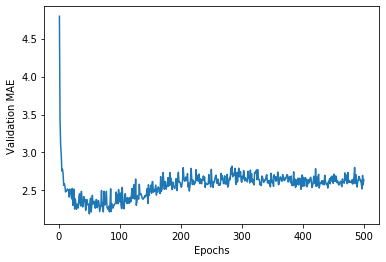

In [65]:
# 검증 그래프
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

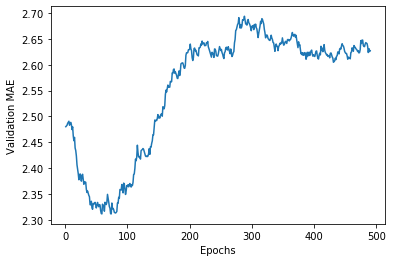

In [71]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show

In [75]:
# 약 80번째에 줄어드는것이 멈춤
model = build_model()
model.fit(train_data, train_targets,
         epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 430us/step - loss: 511.1451 - mae: 20.7177
Epoch 2/80
404/404 [==============================] - 0s 197us/step - loss: 343.7651 - mae: 16.4748
Epoch 3/80
404/404 [==============================] - 0s 193us/step - loss: 172.2105 - mae: 10.8263
Epoch 4/80
404/404 [==============================] - 0s 223us/step - loss: 79.3951 - mae: 6.6172
Epoch 5/80
404/404 [==============================] - 0s 203us/step - loss: 46.7220 - mae: 4.9721
Epoch 6/80
404/404 [==============================] - 0s 195us/step - loss: 33.4074 - mae: 4.1626
Epoch 7/80
404/404 [==============================] - 0s 193us/step - loss: 27.3487 - mae: 3.6917
Epoch 8/80
404/404 [==============================] - 0s 359us/step - loss: 24.2446 - mae: 3.4792
Epoch 9/80
404/404 [==============================] - 0s 200us/step - loss: 22.0862 - mae: 3.2948
Epoch 10/80
404/404 [==============================] - 0s 215us/step - loss: 19.8162 - mae: 3.0843
Epoch 11/80
4

In [76]:
print(test_mae_score, test_mae_score)

2.5827550888061523 2.5827550888061523
